<a href="https://colab.research.google.com/github/mainak555/lb-ai/blob/ai/ActivationFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
class Squash:
    def __init__(self):
        self.function = {
            'sigmoid': lambda x: 1 / (1 + np.exp(-x)),
            'tanh': lambda x: np.tanh(x),
            'arctan': lambda x: np.arctan(x),
            'softmax': lambda x: (lambda exps= np.exp(x): exps / float(sum(exps)))(),
            'softplus': lambda x: np.log(1 + np.exp(x)),
            'swish': lambda x: x / (1 + np.exp(-x)),
            'identity': lambda x: x,
            'relu': lambda x: [item if item >= 0 else 0 for item in x],
            'prelu': lambda x, alpha: [item if item >= 0 else alpha * item for item in x],
            'elu': lambda x, alpha: [item if item >= 0 else np.dot(alpha, np.exp(item) - 1) for item in x]
            }            
        
        self.derivative = {
            'sigmoid': lambda x: (lambda fx= self.function['sigmoid'](x): fx * (1 - fx))(),
            'tanh': lambda x: (lambda fx = self.function['tanh'](x): 1 - fx**2)(),
            'arctan': lambda x: 1 / (1 + x**2),
            'softmax': lambda x: (lambda fx= self.function['softmax'](x): fx * (1 - fx))(),
            'softplus': lambda x: self.function['sigmoid'](x),
            'swish': lambda x: (lambda x= x, fx= x * self.function['sigmoid'](x): fx + (1 - fx) * self.function['sigmoid'](x))(),
            'identity': lambda x: np.ones(x.shape[0]),
            'relu': lambda x: [1 if item >= 0 else 0 for item in x],
            'prelu': lambda x, alpha: [1 if item >= 0 else alpha for item in x],
            'elu': lambda x, alpha: [1 if item >= 0 else sum(self.function['elu']([item], alpha), alpha) for item in x]
        }

In [0]:
import matplotlib.pyplot as plt
activation = Squash()
z = np.arange(-5, 5, 0.1)
prn = lambda i, fx, d_fx: print('>>{}\n-f(x):\n{}\n-df/dx:\n{}'.format(i, fx, d_fx))

>>0
-f(x):
[0.00669285 0.00739154 0.00816257 0.0090133  0.0099518  0.01098694
 0.01212843 0.01338692 0.01477403 0.0163025  0.01798621 0.01984031
 0.02188127 0.02412702 0.02659699 0.02931223 0.03229546 0.03557119
 0.03916572 0.04310725 0.04742587 0.05215356 0.05732418 0.06297336
 0.06913842 0.07585818 0.0831727  0.09112296 0.09975049 0.10909682
 0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86989153 0.88079708 0.89090318
 0.90024951 0.90887704 0.9168273  0.92414182 0.93086158 0.93702664
 0.94267582 0.94784644 0.95257413 0.95689275 0.96083428 0.96442881
 0.96770454 0.97068777 0.97340301 0.97587298 0.978118

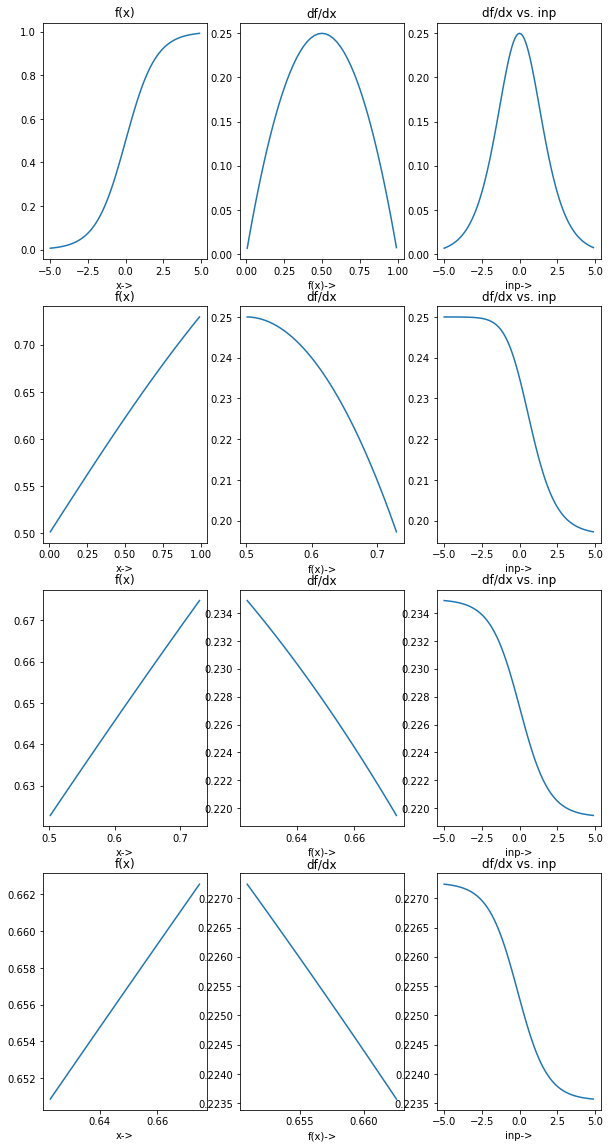

In [3]:
#Sigmoid
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
for i in range(4):
    fx = activation.function['sigmoid'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['sigmoid'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx)
    prn(i, fx, ddx_of_fx)
    a = fx
plt.show()

>>0
-f(x):
[-9.99909204e-01 -9.99889103e-01 -9.99864552e-01 -9.99834566e-01
 -9.99797942e-01 -9.99753211e-01 -9.99698579e-01 -9.99631856e-01
 -9.99550366e-01 -9.99450844e-01 -9.99329300e-01 -9.99180866e-01
 -9.98999598e-01 -9.98778241e-01 -9.98507942e-01 -9.98177898e-01
 -9.97774928e-01 -9.97282960e-01 -9.96682398e-01 -9.95949359e-01
 -9.95054754e-01 -9.93963167e-01 -9.92631520e-01 -9.91007454e-01
 -9.89027402e-01 -9.86614298e-01 -9.83674858e-01 -9.80096396e-01
 -9.75743130e-01 -9.70451937e-01 -9.64027580e-01 -9.56237458e-01
 -9.46806013e-01 -9.35409071e-01 -9.21668554e-01 -9.05148254e-01
 -8.85351648e-01 -8.61723159e-01 -8.33654607e-01 -8.00499022e-01
 -7.61594156e-01 -7.16297870e-01 -6.64036770e-01 -6.04367777e-01
 -5.37049567e-01 -4.62117157e-01 -3.79948962e-01 -2.91312612e-01
 -1.97375320e-01 -9.96679946e-02 -1.77635684e-14  9.96679946e-02
  1.97375320e-01  2.91312612e-01  3.79948962e-01  4.62117157e-01
  5.37049567e-01  6.04367777e-01  6.64036770e-01  7.16297870e-01
  7.61594156e-

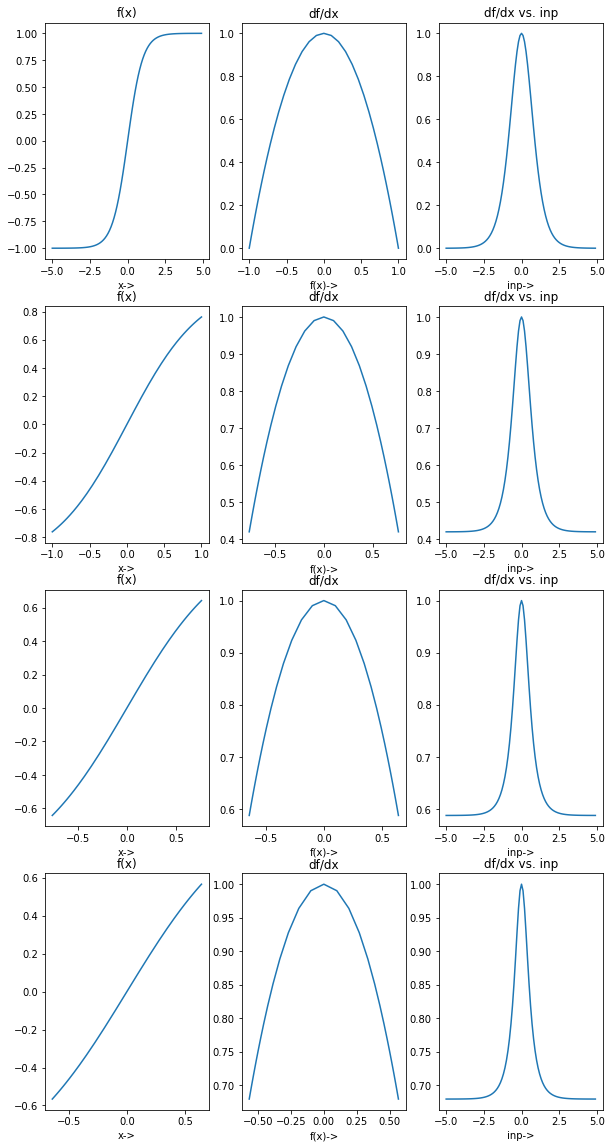

In [4]:
#Tanh
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
for i in range(4):
    fx = activation.function['tanh'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['tanh'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx)
    prn(i, fx, ddx_of_fx)
    a = fx
plt.show()

>>0
-f(x):
[-1.37340077e+00 -1.36947922e+00 -1.36540094e+00 -1.36115648e+00
 -1.35673564e+00 -1.35212738e+00 -1.34731973e+00 -1.34229969e+00
 -1.33705315e+00 -1.33156473e+00 -1.32581766e+00 -1.31979364e+00
 -1.31347261e+00 -1.30683260e+00 -1.29984948e+00 -1.29249667e+00
 -1.28474489e+00 -1.27656176e+00 -1.26791146e+00 -1.25875421e+00
 -1.24904577e+00 -1.23873686e+00 -1.22777239e+00 -1.21609067e+00
 -1.20362249e+00 -1.19028995e+00 -1.17600521e+00 -1.16066899e+00
 -1.14416883e+00 -1.12637712e+00 -1.10714872e+00 -1.08631840e+00
 -1.06369782e+00 -1.03907226e+00 -1.01219701e+00 -9.82793723e-01
 -9.50546841e-01 -9.15100701e-01 -8.76058051e-01 -8.32981267e-01
 -7.85398163e-01 -7.32815102e-01 -6.74740942e-01 -6.10725964e-01
 -5.40419500e-01 -4.63647609e-01 -3.80506377e-01 -2.91456794e-01
 -1.97395560e-01 -9.96686525e-02 -1.77635684e-14  9.96686525e-02
  1.97395560e-01  2.91456794e-01  3.80506377e-01  4.63647609e-01
  5.40419500e-01  6.10725964e-01  6.74740942e-01  7.32815102e-01
  7.85398163e-

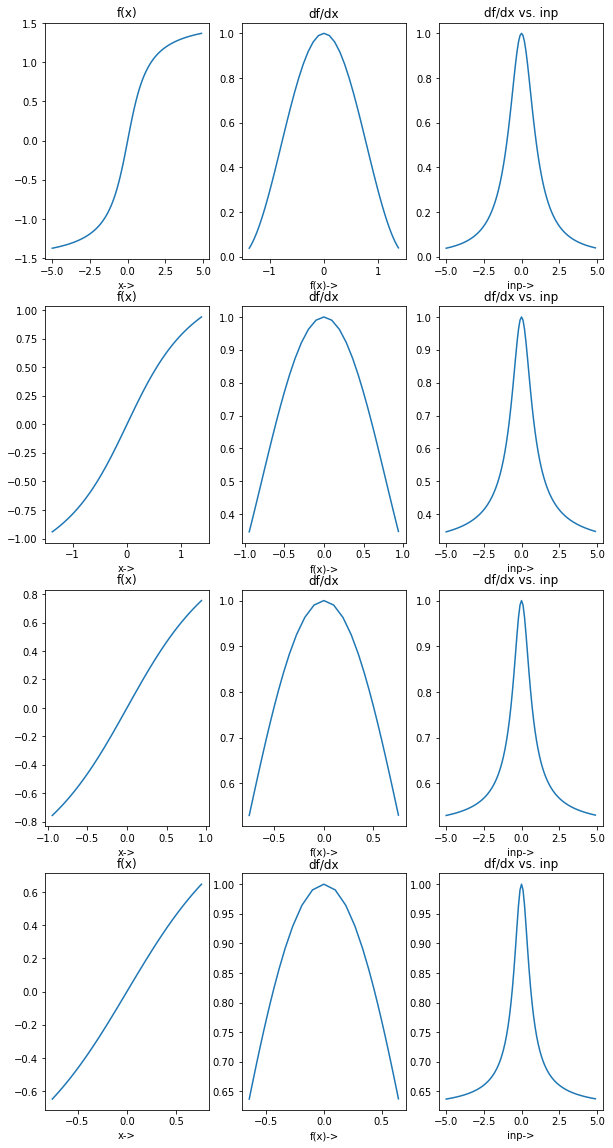

In [5]:
#ArcTan
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
for i in range(4):
    fx = activation.function['arctan'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['arctan'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx)
    prn(i, fx, ddx_of_fx)
    a = fx
plt.show()

>>0
-f(x):
[4.77496908e-06 5.27715696e-06 5.83216040e-06 6.44553406e-06
 7.12341680e-06 7.87259308e-06 8.70056093e-06 9.61560691e-06
 1.06268891e-05 1.17445288e-05 1.29797117e-05 1.43447999e-05
 1.58534556e-05 1.75207781e-05 1.93634544e-05 2.13999267e-05
 2.36505767e-05 2.61379295e-05 2.88868796e-05 3.19249392e-05
 3.52825144e-05 3.89932088e-05 4.30941604e-05 4.76264128e-05
 5.26353263e-05 5.81710319e-05 6.42889328e-05 7.10502589e-05
 7.85226798e-05 8.67809821e-05 9.59078177e-05 1.05994531e-04
 1.17142073e-04 1.29462012e-04 1.43077651e-04 1.58125259e-04
 1.74755438e-04 1.93134628e-04 2.13446774e-04 2.35895167e-04
 2.60704478e-04 2.88123007e-04 3.18425169e-04 3.51914236e-04
 3.88925379e-04 4.29829018e-04 4.75034531e-04 5.24994349e-04
 5.80208486e-04 6.41229545e-04 7.08668245e-04 7.83199535e-04
 8.65569349e-04 9.56602073e-04 1.05720879e-03 1.16839641e-03
 1.29127773e-03 1.42708260e-03 1.57717018e-03 1.74304262e-03
 1.92636001e-03 2.12895706e-03 2.35286143e-03 2.60031403e-03
 2.87379144e-

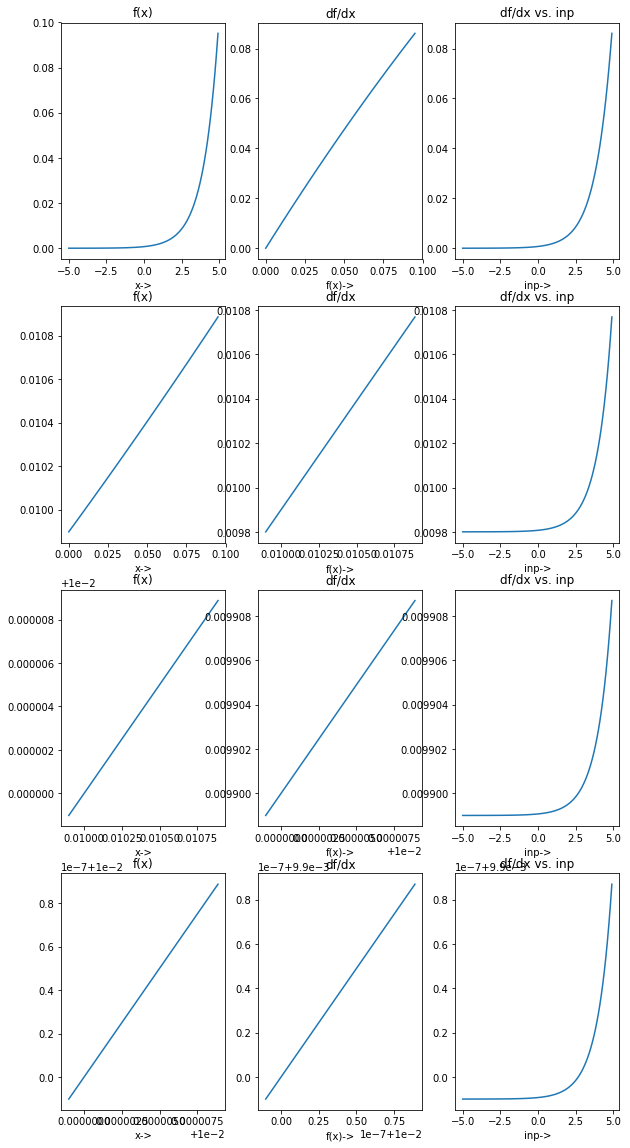

In [6]:
#Softmax
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
for i in range(4):
    fx = activation.function['softmax'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['softmax'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx)
    prn(i, fx, ddx_of_fx)
    a = fx
plt.show()

>>0
-f(x):
[0.00671535 0.00741899 0.00819607 0.00905416 0.01000165 0.01104774
 0.01220258 0.01347733 0.01488425 0.01643685 0.01814993 0.02003977
 0.02212422 0.02442285 0.02695709 0.02975042 0.03282847 0.03621926
 0.03995333 0.04406397 0.04858735 0.05356278 0.05903283 0.06504356
 0.07164469 0.07888973 0.08683615 0.09554546 0.10508332 0.11551952
 0.12692801 0.13938676 0.15297761 0.16778603 0.18390074 0.20141328
 0.22041741 0.24100845 0.26328247 0.28733533 0.31326169 0.34115387
 0.37110067 0.40318605 0.43748795 0.47407698 0.51301525 0.55435524
 0.59813887 0.64439666 0.69314718 0.74439666 0.79813887 0.85435524
 0.91301525 0.97407698 1.03748795 1.10318605 1.17110067 1.24115387
 1.31326169 1.38733533 1.46328247 1.54100845 1.62041741 1.70141328
 1.78390074 1.86778603 1.95297761 2.03938676 2.12692801 2.21551952
 2.30508332 2.39554546 2.48683615 2.57888973 2.67164469 2.76504356
 2.85903283 2.95356278 3.04858735 3.14406397 3.23995333 3.33621926
 3.43282847 3.52975042 3.62695709 3.72442285 3.8221

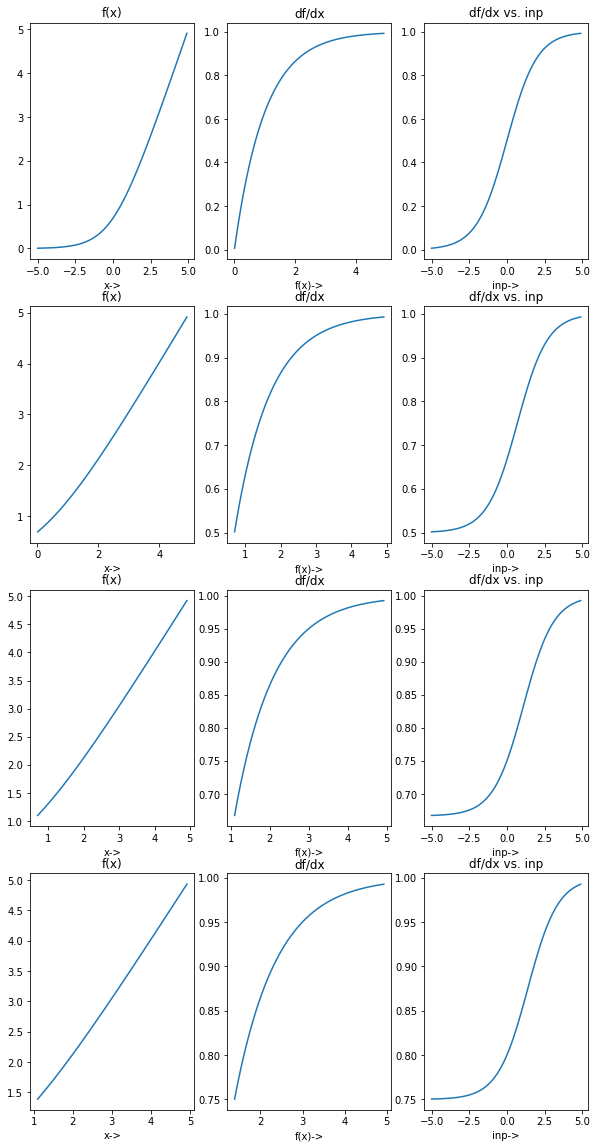

In [7]:
#SoftPlus
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
for i in range(4):
    fx = activation.function['softplus'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['softplus'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx) 
    prn(i, fx, ddx_of_fx)   
    a = fx
plt.show()

>>0
-f(x):
[-3.34642546e-02 -3.62185526e-02 -3.91803415e-02 -4.23625037e-02
 -4.57782886e-02 -4.94412418e-02 -5.33651139e-02 -5.75637467e-02
 -6.20509331e-02 -6.68402474e-02 -7.19448398e-02 -7.73771924e-02
 -8.31488296e-02 -8.92699792e-02 -9.57491769e-02 -1.02592808e-01
 -1.09804580e-01 -1.17384925e-01 -1.25330313e-01 -1.33632490e-01
 -1.42277620e-01 -1.51245333e-01 -1.60507693e-01 -1.70028061e-01
 -1.79759893e-01 -1.89645450e-01 -1.99614472e-01 -2.09582810e-01
 -2.19451076e-01 -2.29103325e-01 -2.38405844e-01 -2.47206101e-01
 -2.55331917e-01 -2.62590951e-01 -2.68770584e-01 -2.73638286e-01
 -2.76942556e-01 -2.78414522e-01 -2.77770260e-01 -2.74713884e-01
 -2.68941421e-01 -2.60145448e-01 -2.48020415e-01 -2.32268559e-01
 -2.12606216e-01 -1.88770334e-01 -1.60524936e-01 -1.27667245e-01
 -9.00332005e-02 -4.75020813e-02 -8.88178420e-15  5.24979187e-02
  1.09966799e-01  1.72332755e-01  2.39475064e-01  3.11229666e-01
  3.87393784e-01  4.67731441e-01  5.51979585e-01  6.39854552e-01
  7.31058579e-

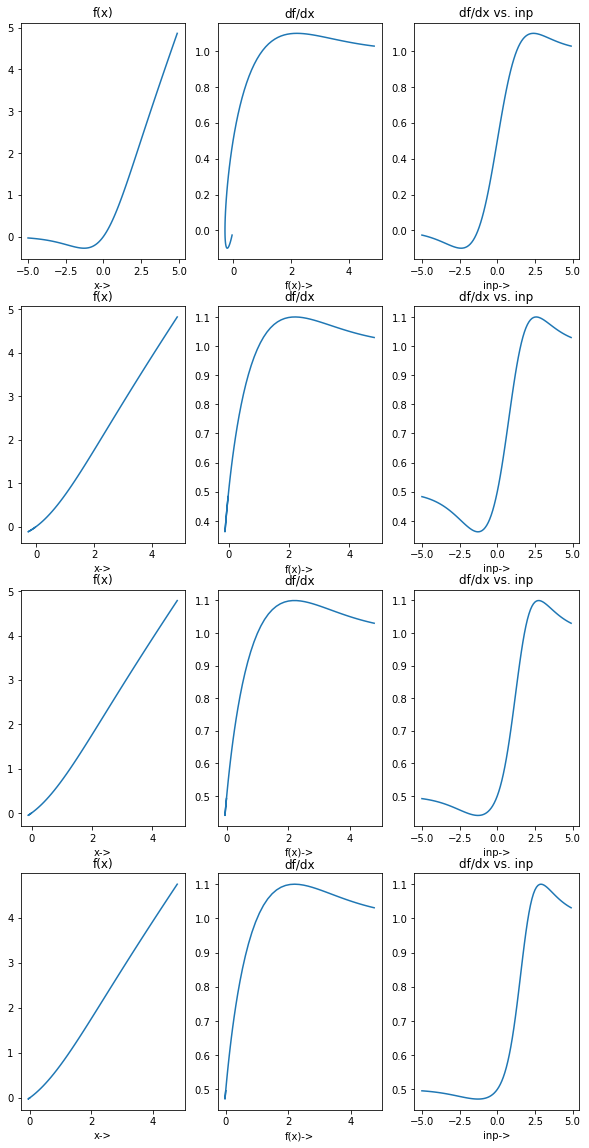

In [8]:
#Swish
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
for i in range(4):
    fx = activation.function['swish'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['swish'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx) 
    prn(i, fx, ddx_of_fx)   
    a = fx
plt.show()

>>0
-f(x):
[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+

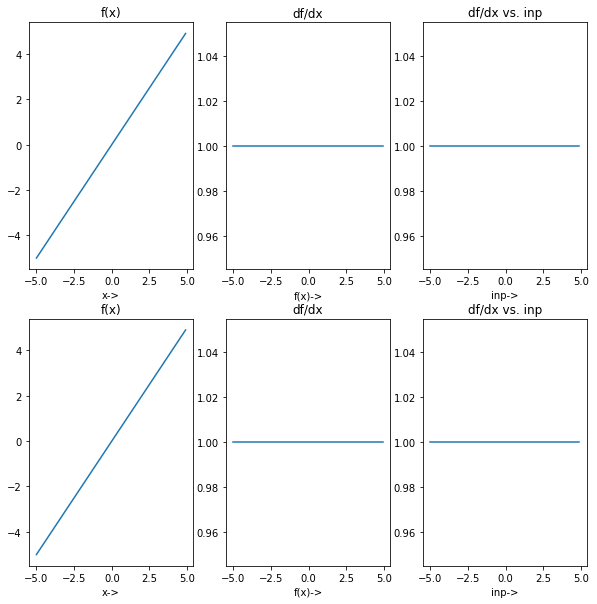

In [9]:
#Identity
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
a = z
for i in range(2):
    fx = activation.function['identity'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['identity'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx) 
    prn(i, fx, ddx_of_fx)   
    a = fx
plt.show()

>>0
-f(x):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09999999999998188, 0.19999999999998153, 0.29999999999998117, 0.3999999999999808, 0.49999999999998046, 0.5999999999999801, 0.6999999999999797, 0.7999999999999794, 0.899999999999979, 0.9999999999999787, 1.0999999999999783, 1.199999999999978, 1.2999999999999776, 1.3999999999999773, 1.499999999999977, 1.5999999999999766, 1.6999999999999762, 1.7999999999999758, 1.8999999999999755, 1.9999999999999751, 2.0999999999999748, 2.1999999999999744, 2.299999999999974, 2.3999999999999737, 2.4999999999999734, 2.599999999999973, 2.6999999999999726, 2.7999999999999723, 2.899999999999972, 2.9999999999999716, 3.0999999999999712, 3.199999999999971, 3.2999999999999705, 3.39999999999997, 3.49999999999997, 3.5999999999999694, 3.699999999999969, 3.7999999999999687, 3.8999999999999684, 3.999999999999968, 4.099999999999968, 4.199999999999967, 4.2999

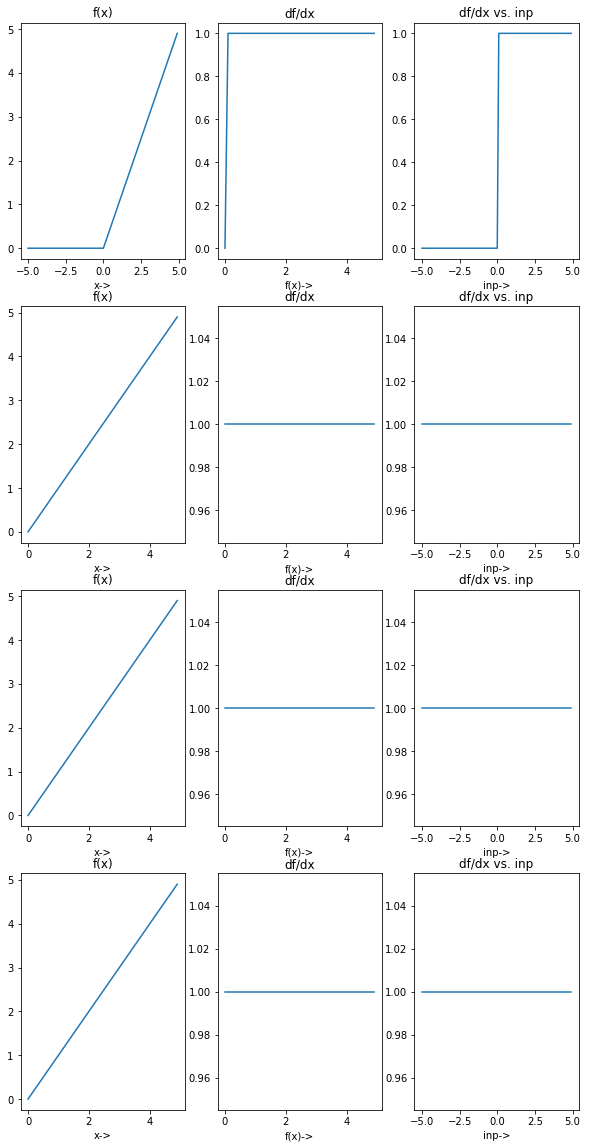

In [10]:
#ReLu
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
for i in range(4):
    fx = activation.function['relu'](a)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['relu'](a)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx) 
    prn(i, fx, ddx_of_fx)   
    a = fx
plt.show()

>>0
-f(x):
[-11.25, -11.025, -10.8, -10.575000000000003, -10.350000000000003, -10.125000000000004, -9.900000000000006, -9.675000000000006, -9.450000000000006, -9.225000000000007, -9.000000000000007, -8.77500000000001, -8.55000000000001, -8.32500000000001, -8.100000000000012, -7.875000000000012, -7.650000000000013, -7.425000000000013, -7.200000000000014, -6.975000000000016, -6.750000000000016, -6.525000000000016, -6.300000000000018, -6.075000000000019, -5.850000000000019, -5.6250000000000195, -5.400000000000021, -5.175000000000022, -4.950000000000022, -4.725000000000023, -4.500000000000024, -4.275000000000025, -4.050000000000026, -3.8250000000000264, -3.600000000000027, -3.375000000000028, -3.1500000000000288, -2.9250000000000296, -2.7000000000000304, -2.475000000000031, -2.250000000000032, -2.0250000000000328, -1.8000000000000336, -1.5750000000000344, -1.3500000000000352, -1.125000000000036, -0.9000000000000368, -0.6750000000000376, -0.45000000000003837, -0.22500000000003917, -3.996802

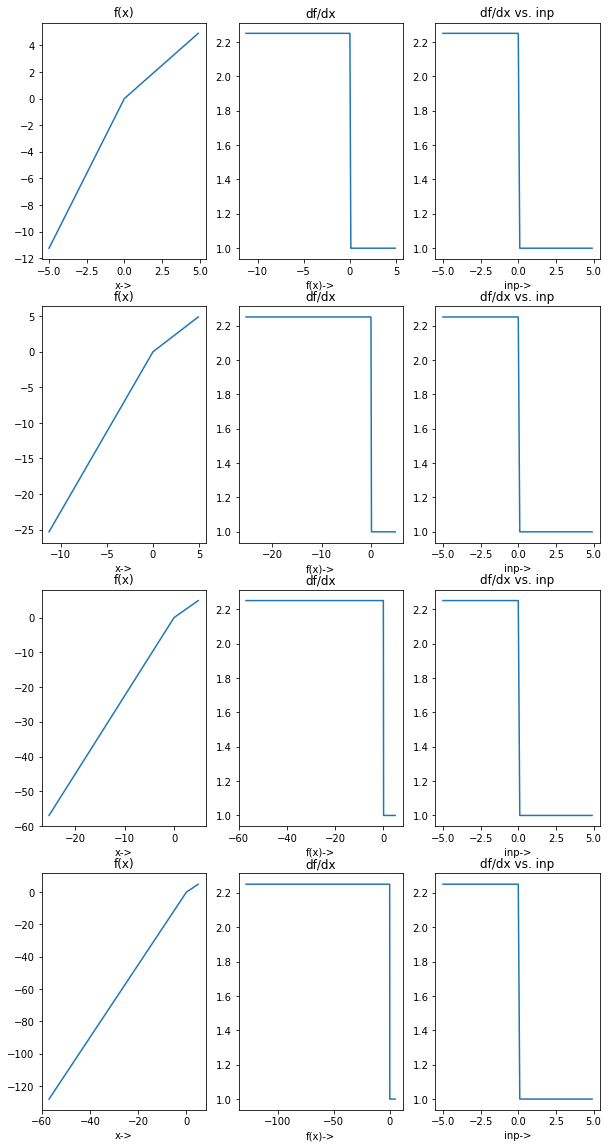

In [11]:
#PReLu
fig, ax = plt.subplots(4, 3, figsize=(10, 20))
a = z
alpha = 2.25
for i in range(4):
    fx = activation.function['prelu'](a, alpha)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['prelu'](a, alpha)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx) 
    prn(i, fx, ddx_of_fx)   
    a = fx
plt.show()

>>0
-f(x):
[-2.2348396192520577, -2.2332451880904203, -2.231483069139705, -2.2295356265211845, -2.2273833695745746, -2.225004757788955, -2.222375985218096, -2.219470742222548, -2.216259952153925, -2.2127114803460373, -2.2087898125003482, -2.20445569924694, -2.1996657633236274, -2.1943720654417365, -2.188521624493592, -2.1820558872997835, -2.1749101425892667, -2.1670128733472107, -2.1582850410486767, -2.1486392946144957, -2.137979096172307, -2.126197754873085, -2.1131773590932608, -2.098787596335564, -2.08288444901775, -2.0653087530962293, -2.0458846050988235, -2.0244176016236937, -2.000692893684751, -1.9744730364307936, -1.9454956127176246, -1.9134706067490748, -1.8780775015014344, -1.8389620708813519, -1.7957328345120307, -1.7479571396660392, -1.6951568311313925, -1.6368034656734798, -1.5723130231975546, -1.5010400616793313, -1.4222712573642664, -1.3352182655836653, -1.2390098307362665, -1.1326830664693457, -1.0151738187884598, -0.8853060156465965, -0.7417798964198362, -0.583159003466

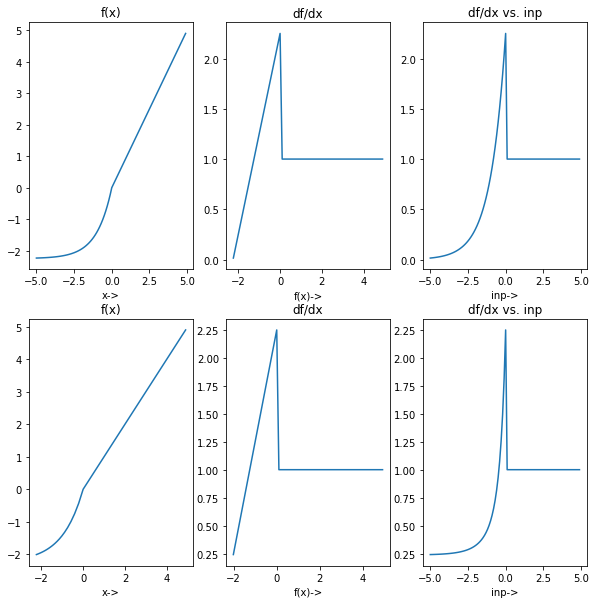

In [12]:
#ELu
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
a = z
for i in range(2):
    fx = activation.function['elu'](a, alpha)
    ax[i, 0].set_title('f(x)')
    ax[i, 0].set_xlabel('x->')
    ax[i, 0].plot(a, fx)    
    ddx_of_fx = activation.derivative['elu'](a, alpha)
    ax[i, 1].set_title('df/dx')
    ax[i, 1].set_xlabel('f(x)->')
    ax[i, 1].plot(fx, ddx_of_fx)
    ax[i, 2].set_title('df/dx vs. inp')
    ax[i, 2].set_xlabel('inp->')
    ax[i, 2].plot(z, ddx_of_fx) 
    prn(i, fx, ddx_of_fx)   
    a = fx
plt.show()